In [94]:
import pandas as pd
import numpy as np
import itertools
import yfinance as yf
import matplotlib.pyplot as plt

# Portfolio Calculator

## Individual Asset Calculations

In [95]:
stocks=["PLTR","BA","NVDA","NFLX","AMZN","AAPL","CLF"]
#weights = [0.1,0.1,0.1,0.1,0.1,0.1,0.4]
period = "10y"
interval = "1d"
r_f = 0.038 / 252 #Risk free rate, based off US 10 Yr.

In [96]:
def stockRequest(stocks, period, interval):
    """
    Uses the Yahoo Finance API to request stock price data.
    Returns 3 dataframes: percent change, standard deviation (std),
    and mean
    
    :Parameters:
    stocks : list-type object of stock tickers
    period : str
        Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        Either Use period parameter or use start and end
    interval : str
        Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        Intraday data cannot extend last 60 days
    """
    returnsDf=pd.DataFrame()
    for i in stocks:
        stock = yf.Ticker(i)
        hist=pd.DataFrame(stock.history(period=period,interval=interval).Close)
        returnsDf[i]=hist.Close
    returnsDf=returnsDf.pct_change().iloc[1:,:]
    std = returnsDf.std()
    mean = returnsDf.mean()

    return returnsDf, std, mean

In [97]:
def multiAssetMarkowitzPortfolio(stocks,weights,mean,std,returnsDf,covariance =0):

    w=pd.Series(weights,stocks)
    expectedReturn = np.dot(mean,weights)

    for x in itertools.combinations(stocks,2):
        covariance+=2*w.loc[list(x)].product()*std.loc[list(x)].product()*returnsDf.loc[:,x].cov().iloc[1,0]

    portVar = np.dot((w**2),(std**2))+covariance
    portStDev = portVar**0.5

    return expectedReturn,portVar,portStDev

## Iterate Through Weight Combinations

In [98]:
#Call the relevant stock data: % returns, standard deviation, mean
returnsDf,std,mean = stockRequest(stocks,period,interval)

In [99]:
trials = 3000
weightDict={}
n_stocks = len(stocks)
#Creates Portfolios with Random Weights
for i in range(trials):
    #Generates random weights as a function as the number of stocks
    randWeight=np.round(np.random.dirichlet(np.ones(n_stocks),size=1),12)

    weight=randWeight.tolist()[0]    
    
    #Output weights here may not sum to 1 because they are rounded to make the output more readable.
    weightDict[tuple(np.round(weight,4))]=multiAssetMarkowitzPortfolio(stocks,weight,mean,std,returnsDf)

## Optimal Weights

In [100]:
df = pd.DataFrame.from_dict(weightDict,orient='index',columns=["r","var","stdev"])\
.sort_values(by='r',ascending=False)

In [101]:
df["sharpe"]=(df.r - r_f)/df.stdev #Calculates sharpe score

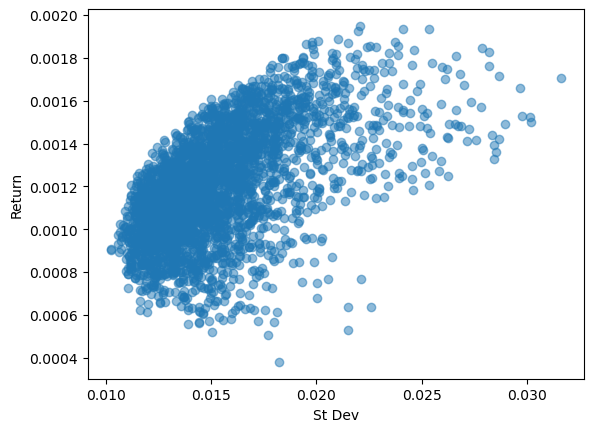

In [102]:
#plots portfolio return with portfolio stdev
plt.scatter(df.stdev,df.r,alpha=0.5)
plt.xlabel("St Dev")
plt.ylabel("Return")
plt.show()

In [103]:
df.sort_values("sharpe",ascending=False).head()

,r,var,stdev,sharpe
"(0.0874, 0.1649, 0.2599, 0.0432, 0.044, 0.2369, 0.1636)",0.001418,0.000163,0.012748,0.099433
"(0.0752, 0.1425, 0.2301, 0.0225, 0.0625, 0.2856, 0.1816)",0.001386,0.000155,0.012438,0.099272
"(0.0834, 0.1579, 0.2277, 0.0977, 0.0488, 0.219, 0.1656)",0.001354,0.000149,0.012190,0.098688
"(0.0647, 0.1274, 0.2491, 0.0882, 0.0448, 0.2283, 0.1974)",0.001408,0.000163,0.012783,0.098381
"(0.1096, 0.0618, 0.2805, 0.0495, 0.0183, 0.2713, 0.2089)",0.001533,0.000198,0.014069,0.098234


<Axes: >

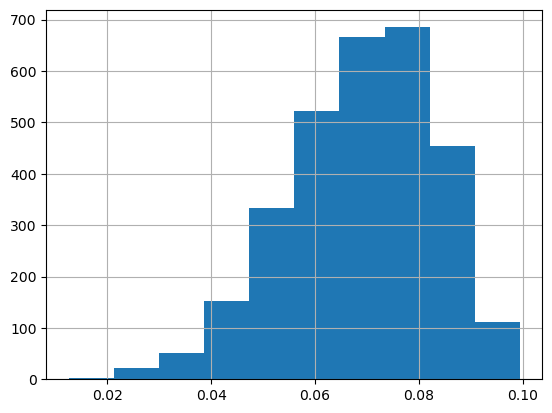

In [104]:
df.sharpe.hist()

In [105]:
df_sorted=df.sort_values("sharpe",ascending=False).head() #sorts dataframe by sharpe score
df_sorted.head()

,r,var,stdev,sharpe
"(0.0874, 0.1649, 0.2599, 0.0432, 0.044, 0.2369, 0.1636)",0.001418,0.000163,0.012748,0.099433
"(0.0752, 0.1425, 0.2301, 0.0225, 0.0625, 0.2856, 0.1816)",0.001386,0.000155,0.012438,0.099272
"(0.0834, 0.1579, 0.2277, 0.0977, 0.0488, 0.219, 0.1656)",0.001354,0.000149,0.012190,0.098688
"(0.0647, 0.1274, 0.2491, 0.0882, 0.0448, 0.2283, 0.1974)",0.001408,0.000163,0.012783,0.098381
"(0.1096, 0.0618, 0.2805, 0.0495, 0.0183, 0.2713, 0.2089)",0.001533,0.000198,0.014069,0.098234


In [106]:
opt_weights=df_sorted.index[0] #takes optimal weight of best portfolio

In [107]:
opt_port=dict(zip(stocks,opt_weights)) #combines optimal weights with stock names

In [108]:
print(opt_port)

{'PLTR': 0.0874, 'BA': 0.1649, 'NVDA': 0.2599, 'NFLX': 0.0432, 'AMZN': 0.044, 'AAPL': 0.2369, 'CLF': 0.1636}


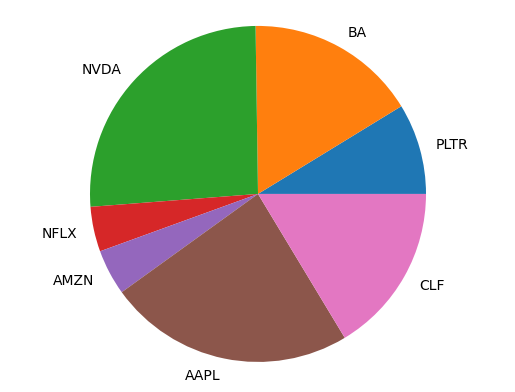

In [109]:
#Plot Optimal Portfolio
s =[]
w =[]
for x, y in opt_port.items():
    s.append(x)
    w.append(y)

# Plot
plt.pie(w, labels=s)
plt.axis('equal')
plt.show()